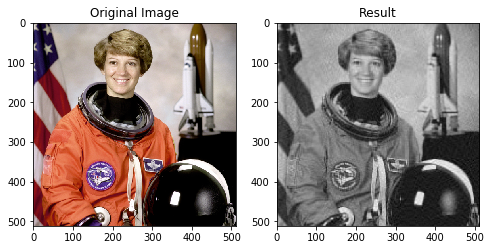

134


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import svd
from skimage import data, img_as_float
from skimage.color import rgb2gray


def perform_svd(matrix, k):
    """
    Performs SVD on two dimantional matrix
    :param m: matrix
    :param k: number of singular vectors to be used during the matrix reconstruction
    :return: a matrix reconstructed using k singular vectors
    """
    U, s, V = svd(matrix)
    return np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(V[:k, :])


def perform_percent_svd(matrix, percent=0.9):
    """
    Performs SVD on two dimensional matrix
    
    :param matrix: matrix
    :param percent: the compression rate 
    :return: reconstructed matrix 
    """
    U, s, V = svd(matrix)
    total_energy = np.sum(s)
    k = 1
    while(np.sum(s[:k])/total_energy) <= percent:
        k += 1
    return np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(V[:k, :])

def print_result_decorator(original_function):
    def wrapper(*args, **kwargs):
        res = original_function(*args, **kwargs)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
        plt.gray()
    
        ax[0].imshow(args[0])
        ax[0].set_title('Original Image')

        ax[1].imshow(res)
        ax[1].set_title('Result')
        plt.show()
    return wrapper


@print_result_decorator
def compress_image_with_svd(img_to_compress, k):
    """
    :param img_to_compress: 
    :param k: 
    :return: 
    """
    img_matrix = img_as_float(rgb2gray(img_to_compress))
    compressed = perform_svd(img_matrix, k)
    return compressed

img_matrix = img_as_float(rgb2gray(data.astronaut()))
svd_compressed = compress_image_with_svd(data.astronaut(), 50)
l = perform_percent_svd(img_matrix)
    
    

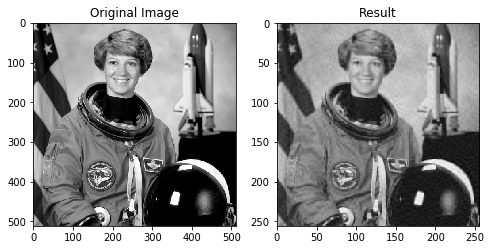

In [21]:
import pywt
import scipy

@print_result_decorator
def perform_dwt(image_to_compress):
    scipy.misc.imsave('photo/real.jpg', image_to_compress)
    coefs = pywt.dwt2(perform_svd(image_to_compress,50), 'haar')
    compressed, (a,b,c) = coefs
    scipy.misc.imsave('photo/compressed.jpg', compressed)
    return compressed
    
perform_dwt(img_matrix)

